In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np

In [1]:
batch_size = 64
w = 32
h = 64
epochs=13

In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'D:\Coding\License plate digits\CNN letter Dataset', 
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    'D:\Coding\License plate digits\CNN letter Dataset', 
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 8240 images belonging to 10 classes.
Found 2060 images belonging to 10 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(w, h, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Add more layers as needed
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)


Epoch 1/13


128/128 [==============================] - 158s 1s/step - loss: 0.8540 - accuracy: 0.7650 - val_loss: 0.2905 - val_accuracy: 0.8921
Epoch 2/13
128/128 [==============================] - 7s 51ms/step - loss: 0.1528 - accuracy: 0.9614 - val_loss: 0.1473 - val_accuracy: 0.9570
Epoch 3/13
128/128 [==============================] - 7s 51ms/step - loss: 0.0814 - accuracy: 0.9843 - val_loss: 0.1370 - val_accuracy: 0.9492
Epoch 4/13
128/128 [==============================] - 6s 50ms/step - loss: 0.0422 - accuracy: 0.9922 - val_loss: 0.0765 - val_accuracy: 0.9741
Epoch 5/13
128/128 [==============================] - 6s 50ms/step - loss: 0.0347 - accuracy: 0.9935 - val_loss: 0.0803 - val_accuracy: 0.9766
Epoch 6/13
128/128 [==============================] - 6s 50ms/step - loss: 0.0233 - accuracy: 0.9957 - val_loss: 0.0569 - val_accuracy: 0.9814
Epoch 7/13
128/128 [==============================] - 6s 50ms/step - loss: 0.0130 - accuracy: 0.9980 - val_loss: 0.0701 - val_accuracy: 0.97

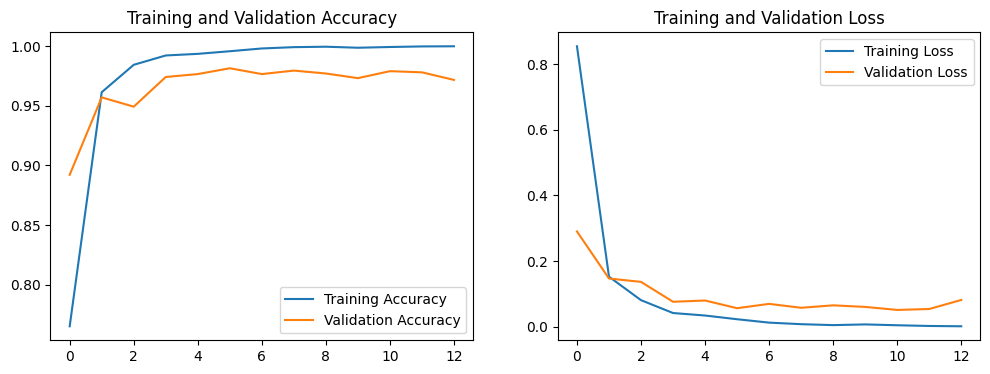

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Prediction

In [3]:
model = tf.keras.models.load_model("Digits.h5")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 28: invalid continuation byte

In [7]:
img_path = r"test4.png"
img = Image.open(img_path).convert('RGB')
img = img.resize((h, w))

In [8]:
img_array = img_to_array(img)
img_array /= 255.0
img_batch = np.expand_dims(img_array, axis=0) 

In [9]:
predictions = model.predict(img_batch)


1/1 [==============================] - 0s 100ms/step


In [10]:
np.argmax(predictions, axis=1)


array([8], dtype=int64)

In [89]:
# model.save("Digits.keras")

In [94]:
predictions[0][4]  # The confidence 4

0.9965258

In [ ]:
model.save